<h1><center> DS 300: Take-home Quiz 6: Association Rules Mining</center></h1>

## Introduction:

The data belongs to a bakery called "The Bread Basket", located in the historic center of Edinburgh. This bakery presents a refreshing offer of Argentine and Spanish products.

Content dataset contains 15,010 observations and more than 6,000 transactions from a bakery. The dataset contains the following columns:

+ Date. Categorical variable that tells us the date of the transactions (YYYY-MM-DD format). The column includes dates from 30/10/2016 to 09/04/2017.

+ Time. Categorical variable that tells us the time of the transactions (HH:MM:SS format).

+ Transaction. Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction, that's why the dataset has less transactions than observations.

+ Item. The items bought for a particular transcation. 

## Question 1:

#### Import necessary libraries then generate a DataFrame with the given dataset URL ([link](https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lab5_bakery.csv)).

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
url = 'https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lab5_bakery.csv'
df = pd.read_csv(url)



In [229]:
df.head()



,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [230]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


## Question 2:

#### Check the null values in the DataFrame

In [231]:
df.isnull().sum()



Date           0
Time           0
Transaction    0
Item           0
dtype: int64

#### Count the total number of occurences for each item.

In [232]:
df['Item'].value_counts()



Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Chicken sand         1
The BART             1
Adjustment           1
Olum & polenta       1
Bacon                1
Name: Item, Length: 95, dtype: int64

#### How many unique items are there in the DataFrame? Then print the unique items.

In [233]:
print('Unique Items: ',df['Item'].nunique())
print('\n',df['Item'].unique())

Unique Items:  95

 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry 

## Question 3:

#### Remember we did not find any `NaN`s in Question 1? However, there are some hidden `NONE`s in the DataFrame that needs to be taken care of. This is either saying that no item was purchased, or the name of the item was not logged. Either way, this is of no use to us so we drop these rows. 

#### First, reveal the records that contains 'NONE' as the item.

In [234]:
df[df['Item']=='NONE']



,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
...,...,...,...,...
21108,2017-04-08,11:54:22,9590,NONE
21122,2017-04-08,12:58:25,9599,NONE
21254,2017-04-09,12:01:07,9666,NONE
21255,2017-04-09,12:04:13,9667,NONE


#### Then get rid of them!

In [235]:
df.replace('NONE', np.nan, inplace=True)
df.dropna(inplace=True)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB


In [237]:
# Double check to ensure they are gone
df[df['Item']=='NONE']


,Date,Time,Transaction,Item


## Question 4:

#### The Date and Time columns encode many different pieces of information. Splitting up this information is going to make it easier for us to group data points. Use `to_datetime` function from Pandas ([Reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)) to do so..

In [238]:
# First look at a simple example here.

date = pd.to_datetime("2019-11-1", format='%Y-%m-%d')
print("Year: ", date.year)
print("Mon: ", date.month)
print("Day: ", date.day)

Year:  2019
Mon:  11
Day:  1


#### Finish the `split_date_field` function below. Note this function takes in a date in the format of YYYY-MM-DD and generates a tuple as (YYYY, MM, DD).

In [239]:
def split_date_field(date):
    return list(map(int,date.split('-')))
     



In [240]:
# Let's see whether the function works
date_tuple = split_date_field("2019-11-1")
date_tuple

[2019, 11, 1]

#### Now, use the `split_date_field` function to generate 3 new columns for the DataFrame. 
Note: you must use `apply()` and `split_date_field()` in the form of a lambda expression.

In [241]:
# Generate the 'Year' column
df['Year'] = df['Date'].apply(lambda x: split_date_field(x)[0])

In [242]:
# Generate the 'Month' column
df['Month'] = df['Date'].apply(lambda x: split_date_field(x)[1])

In [243]:
# Generate the 'Day' column
df['Day'] = df['Date'].apply(lambda x: split_date_field(x)[2])

In [244]:
# Check out the dataframe again
df.head()

,Date,Time,Transaction,Item,Year,Month,Day
0,2016-10-30,09:58:11,1,Bread,2016,10,30
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,30
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,30
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,30
4,2016-10-30,10:07:57,3,Jam,2016,10,30


## Question 5: 

#### Print to show the top 10 most sold items.

In [245]:
most_sold = df['Item'].value_counts().head(10)


print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64


#### Generate line and bar plots of the top 10 most sold items with matplotlib.

C:\Users\augus\anaconda3\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
C:\Users\augus\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)


<AxesSubplot:title={'center':'Items Most Sold'}>

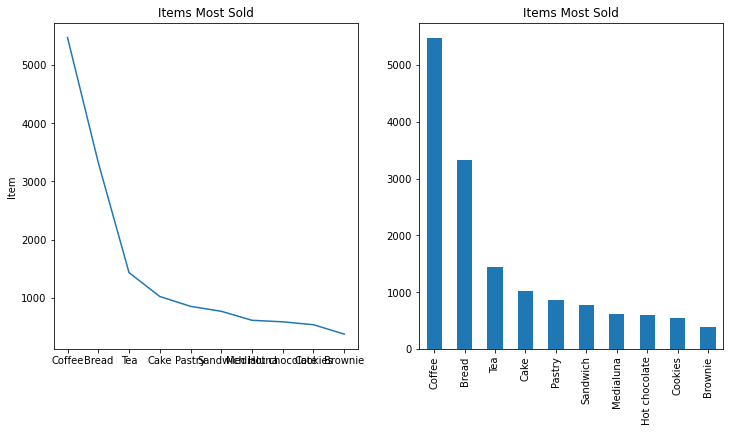

In [264]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(12,6))
# Plot the line and title for the first subplot
sns.lineplot(data=most_sold, ax=axes[0]).set(title='Items Most Sold')
# Plot the line and title for the second subplot
most_sold.plot(kind='bar',title='Items Most Sold', ax=axes[1])



## Question 6:

#### Clearly coffee is the most sold item, followed by bread, tea, cake, and pastry, respectively. This makes sense for a bakery. Now that we know which are the most popular items, let's check out which months bring in the most sales.

In [247]:
monthly_tran = df.groupby(['Month'])['Transaction'].nunique()

monthly_tran

Month
1     1575
2     1630
3     1764
4      509
10     175
11    2140
12    1672
Name: Transaction, dtype: int64

#### Plot the monthly sales in a bar chart. 

<AxesSubplot:title={'center':'Monthly Sales'}, xlabel='Month'>

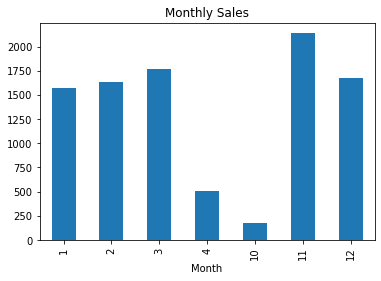

In [248]:
monthly_tran.plot(kind='bar',title='Monthly Sales')




#### This is getting interesting! We see some big differences here. As an exercise to the curious, perhaps it would be worth finding out if this drastic difference in sales is due to the dataset having less data for April and October. This would make sense, as they are the outlier months in the dataset. Let's check to see if there are less daily transactions recorded for these months in comparison to the others.

In [249]:
df.groupby(['Month'])['Day'].nunique()




Month
1     30
2     28
3     31
4      9
10     2
11    30
12    29
Name: Day, dtype: int64

#### Look at that! This intuition was correct. Only 9 days' worth of transactions were recorded for April, and 2 days for October.

#### Brain teaser: what happend the other missing months? Hint: this dataset was recorded in Scottland. 

## Question 7:

#### In the Apriori coding exercise lecture, we manually converted the dataframe into a transactional dataset. Actually, mlxtend has a `TranscationEncoder` function to help us do it. Let's try it out ([reference](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)).

In [250]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [251]:
# This example here shows that you can use a loop to access
# different partitions of `groupby`.
for g in df.groupby('Year')['Item']:
    print (g)

(2016, 0               Bread
1        Scandinavian
2        Scandinavian
3       Hot chocolate
4                 Jam
            ...      
8556            Bread
8557              Tea
8558             Coke
8559             Cake
8560              Tea
Name: Item, Length: 8144, dtype: object)
(2017, 8561          Bread
8562         Coffee
8563         Coffee
8564          Toast
8565     Farm House
            ...    
21288        Coffee
21289           Tea
21290        Coffee
21291        Pastry
21292     Smoothies
Name: Item, Length: 12363, dtype: object)


#### Let's now create a list of the unique transactions so that we can transform our data into the correct format using TransactionEncoder.

In [252]:
transactions=[]

# Use a for loop to generate the list
for i in df.groupby('Transaction')['Item'].apply(list):
    transactions.append(i)

In [253]:
print(transactions)

[['Bread'], ['Scandinavian', 'Scandinavian'], ['Hot chocolate', 'Jam', 'Cookies'], ['Muffin'], ['Coffee', 'Pastry', 'Bread'], ['Medialuna', 'Pastry', 'Muffin'], ['Medialuna', 'Pastry', 'Coffee', 'Tea'], ['Pastry', 'Bread'], ['Bread', 'Muffin'], ['Scandinavian', 'Medialuna'], ['Bread', 'Medialuna', 'Bread'], ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'], ['Basket', 'Bread', 'Coffee'], ['Bread', 'Medialuna', 'Pastry'], ['Mineral water', 'Scandinavian'], ['Bread', 'Medialuna', 'Coffee'], ['Hot chocolate'], ['Farm House'], ['Farm House', 'Bread'], ['Bread', 'Medialuna'], ['Coffee', 'Coffee', 'Medialuna', 'Bread'], ['Jam'], ['Scandinavian', 'Muffin'], ['Bread'], ['Scandinavian'], ['Fudge'], ['Scandinavian'], ['Coffee', 'Bread'], ['Bread', 'Jam'], ['Bread'], ['Basket'], ['Scandinavian', 'Muffin'], ['Coffee'], ['Coffee', 'Muffin'], ['Muffin', 'Scandinavian'], ['Tea', 'Bread'], ['Coffee', 'Bread'], ['Bread', 'Tea'], ['Scandinavian'], ['Juice', 'Tartine', 'Coffee', 'Muffin'], ['Scandinavian'], 

In [254]:
# Check out the total number of transactions
print(len(transactions))

9465


#### Use TranscationEncoder to encode `transcations` into a one-hot encoded dataframe.

In [255]:
# Encoder object
te = TransactionEncoder()

# Train the encoder object with the data
te_ary = te.fit(transactions).transform(transactions)

# Generate a DataFrame
df_tran = pd.DataFrame(te_ary, columns=te.columns_)

df_tran.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Question 8:

#### Now let's apply apriori. I will use min_support as 0.02, and set the min_threshold parameter in the association rules for the lift metric to be 1.0 because if it is less than one, then the two items are not likely to be bought together.

In [256]:
frequent_itemsets = apriori(df_tran, min_support=0.02, use_colnames=True)



rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)



#### Now we will sort the values by confidence in descending order to see the likelihood that an item is bought if its antecedent is bought.

In [257]:
rules.sort_values(by=['confidence'], ascending= False)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
13,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
15,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
11,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
17,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
9,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
1,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865


## Question 9:

#### Now we want to study various combinations of `min_support` and `min_threshold` for lift metric so that we can find the desired number of rules.

In [258]:
# This exmaple tells you that you can customize your column name while generating a DataFrame
s1 = "c1"
s2 = "c2"
d1 = pd.DataFrame(data = [1,2,3], columns = ['Support: %s'%s1]) ## Use string specifier
d2 = pd.DataFrame(data = [4,5,6], columns = ['Support: %s'%s2])
d3 = pd.concat([d1, d2], axis = 1)
d3.head()

,Support: c1,Support: c2
0,1,4
1,2,5
2,3,6


#### Complete the `gen_df_lift` function so that if given 1) a transcation DataFrame, 2) an array of min_support, and 3) an array of min_threshold, the function can generate a DataFrame of total number of rules.

In [259]:
def gen_df_lift(df, support, lift):
    '''
    Input: 1) df: a transcational DataFrame
           2) support: an array of min_support
           3) lift: an array of min_threshold
    Output: A DataFrame. 
           Row: represents a min_threshold for lift.
           Column: represents a min_support for support. 
           Contents: total number of rules given a combo of min_threshold and min_support
    '''
    df_lift = pd.DataFrame() ## Create an empty DataFrame to grow
    for s in support:
        num_rules = []    ## An empty array for the current column
        for l in lift:
            ap_i = apriori(df_tran, min_support=s, use_colnames=True)
            
            rule_i = association_rules(ap_i, metric='lift', min_threshold=l)
            
            num_rules.append( len(rule_i) )
        
        # Create a DataFrame as the example shown above
        df_support = pd.DataFrame(data = num_rules, columns = ['Support: %s'%s])
        
        
        # Grow the df_lift DataFrame by concatenating the new df_support 
        df_lift = pd.concat([df_lift, df_support], axis = 1)
    df_lift = df_lift.set_index(lift)
    return df_lift

#### Use `gen_df_lift` to generate the following DataFrame.

In [260]:
lift = np.arange(1.0, 2.0, 0.1)
support = [0.005,0.01,0.05,0.1]
df_lift = gen_df_lift(df_tran, support, lift)
df_lift

,Support: 0.005,Support: 0.01,Support: 0.05,Support: 0.1
1.0,104,42,2,0
1.1,84,28,2,0
1.2,58,16,0,0
1.3,46,12,0,0
1.4,38,12,0,0
1.5,32,6,0,0
1.6,30,6,0,0
1.7,24,4,0,0
1.8,20,4,0,0
1.9,14,2,0,0


#### Plot the curves. Note the x-axis is not exactly the lift value, but we can get lift from it.

Text(0, 0.5, 'Number of rules')

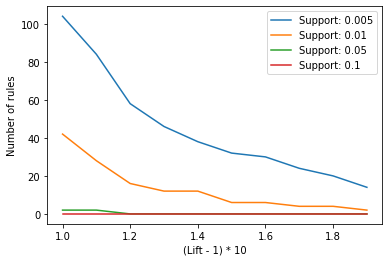

In [261]:
sns.lineplot(data=df_lift, dashes=False)


plt.xlabel('(Lift - 1) * 10')
plt.ylabel('Number of rules')

## Question 10:

#### We find from the plot that when Support is 0.01 and x-axis = 3 (lift = 1.3), we can get descent amount of rules. Let's use these number to re-train the apriori model. Then show the rules with confidence in descending order.

In [262]:
frequent_itemsets = apriori(df_tran, min_support=0.01, use_colnames=True)



rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.3)


# Display rules in descending order
rules.sort_values(by=['confidence'], ascending= False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
3,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
10,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
7,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712
1,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
2,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
9,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033
8,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749
0,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
6,(Tea),(Sandwich),0.142631,0.071844,0.014369,0.100741,1.402222,0.004122,1.032134


## Great job!